# Image Classification Model using CNN

### Problem Statement

Use CIFAR10 data (from [`keras.datasets.cifar10`](https://keras.io/api/datasets/cifar10/)) to build an image classification model using Convolutional Neural Network.

### Load and prepare data for modeling

In [1]:
# labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                'dog', 'frog', 'horse', 'ship', 'truck']

In [2]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

from tensorflow.keras.datasets import cifar10

(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = cifar10.load_data()

X_train_raw.shape, y_train_raw.shape, X_test_raw.shape, y_test_raw.shape

2025-03-20 13:25:51.346183: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742491551.354271   19178 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742491551.356720   19178 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742491551.362926   19178 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742491551.362933   19178 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742491551.362934   19178 computation_placer.cc:177] computation placer alr

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
# reshape the target labels into vector form
y_train_raw = y_train_raw.reshape(-1, )
y_test_raw = y_test_raw.reshape(-1, )

y_train_raw.shape, y_test_raw.shape

((50000,), (10000,))

In [4]:
# create dummies for the target labels
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train_raw, 10)
y_test = to_categorical(y_test_raw, 10)

y_train.shape, y_test.shape

((50000, 10), (10000, 10))

In [5]:
# normalize the training data
from tensorflow.keras.utils import normalize

X_train = normalize(X_train_raw, axis=1)
X_test = normalize(X_test_raw, axis=1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

* Interesting link:
    * [What is the purpose of `keras utils normalize`?](https://stackoverflow.com/questions/52571752/what-is-the-purpose-of-keras-utils-normalize)

In [6]:
# sum of each column (number of images for each label)
y_train.sum(axis=0)

array([5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000.])

For each lable (target value), we have equal number of records (5,000).

### Visualize data

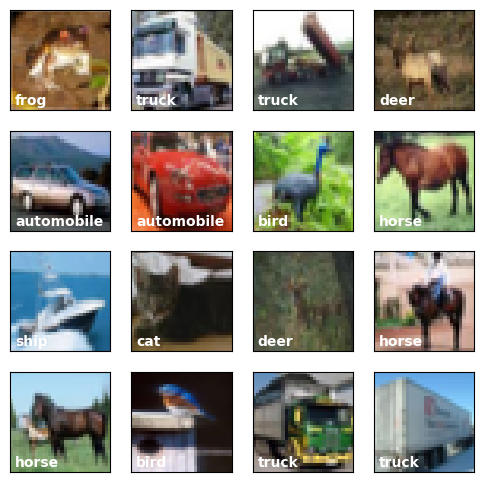

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, 
                         figsize=(6, 6),
                         subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train_raw[i])
    
    act = class_labels[y_train_raw[i]]
    ax.text(0.05, 0.05, act, color='white', fontsize=10,
            weight='semibold', transform=ax.transAxes)

plt.show();

### Build a NN model with hidden layers

Before we start, we need to take a small digression. The keras Neural Network model training results are not easily reproducible since it involves a lot of shuffling and random initializations. In order to maintain consitency, we will have to initialize some random seeds before every model run. We will create a function to do this.

In [8]:
from tensorflow import random as tf_random
import numpy as np
import random

def init_seeds(s):
    '''
    Initializes random seeds prior to model training 
    to ensure reproducibality of training results.
    '''
    tf_random.set_seed(s)
    np.random.seed(s)
    random.seed(s)

Let's build a NN model with three hidden layers.

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten

# initialize seeds
init_seeds(314)

# prepare the model architecture
mlp1 = Sequential(
    [
        Flatten(input_shape=(32, 32, 3)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ], 
    name='mlp_3hidden')

mlp1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# fit and validate the model
mlp1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, shuffle=True);

/home/vishal/code/dapt-631/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
W0000 00:00:1742491555.300968   19178 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2122 - loss: 2.1292 - val_accuracy: 0.3107 - val_loss: 1.9171
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3153 - loss: 1.8980 - val_accuracy: 0.3593 - val_loss: 1.8047
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3547 - loss: 1.8067 - val_accuracy: 0.3685 - val_loss: 1.7721
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3731 - loss: 1.7509 - val_accuracy: 0.3656 - val_loss: 1.7856
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3921 - loss: 1.7127 - val_accuracy: 0.3807 - val_loss: 1.7480
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4050 - loss: 1.6739 - val_accuracy: 0.3920 - val_loss: 1.7153
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4141 - loss: 1.6493 - val_accuracy: 0.3946 - val_loss: 1.7140
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4257 - loss: 1.6204 - 

These results don't look very good. Let's try to add more neurons to the hidden nodes.

* Supplimentary Resource:
    * [Early-stopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)    
* Interesting link:
    * [What is the difference between `sparse_categorical_crossentropy` and `categorical_crossentropy`?](https://stackoverflow.com/questions/58565394/what-is-the-difference-between-sparse-categorical-crossentropy-and-categorical-c)

In [10]:
# initialize seeds
init_seeds(314)

mlp2 = Sequential(
    [
        Flatten(input_shape=(32, 32, 3)),
        Dense(1024, activation='relu'),
        Dense(1024, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ], 
    name='mlp_3hidden_v2')

mlp2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

mlp2.fit(X_train, y_train, epochs=5, shuffle=True);

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.1000 - loss: 2.3097
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.1000 - loss: 2.3028
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.1000 - loss: 2.3028
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.1001 - loss: 2.3028
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.1001 - loss: 2.3028


Again, the NN model is not able to achieve high accuracy. We could try more complicated models but there's a better way to improve the model --> CNN!

### Build a Convolutional Neural Network (CNN) model

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# initialize seeds
init_seeds(314)

cnn = Sequential(
    [
        Conv2D(filters=32, 
               kernel_size=(3, 3), 
               activation='relu', 
               input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ], 
    name='cnn')

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10, shuffle=True);

/home/vishal/code/dapt-631/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.3431 - loss: 1.8141
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5569 - loss: 1.2555
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6291 - loss: 1.0557
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6854 - loss: 0.9052
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7309 - loss: 0.7769
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7740 - loss: 0.6602
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8110 - loss: 0.5557
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8440 - loss: 0.4632
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8665 - loss: 0.3892
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8906 - loss: 0.3225


In [12]:
loss, accuracy = cnn.evaluate(X_test, y_test)
print(f'Loss: {loss:.2%}, Accuracy: {accuracy:.2%}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6013 - loss: 1.8120
Loss: 183.61%, Accuracy: 59.82%


Further fine-tuning would improve the model accuracy. For now, let's proceed with this model.

* Reflections:
    * [How to avoid overfitting in Deep Learning Neural Networks?](https://machinelearningmastery.com/introduction-to-regularization-to-reduce-overfitting-and-improve-generalization-error/)
    * [Something that bothers me about deep neural nets.](https://www.johndcook.com/blog/2017/10/09/something-that-bothers-me-about-deep-neural-nets/)

In [13]:
# predicted probabilities for each class
probs = cnn.predict(X_test)
probs[:3]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[4.3992677e-07, 1.6483838e-09, 4.5821844e-06, 9.8221022e-01,
        2.9850274e-03, 4.3463320e-03, 1.5771440e-03, 2.5352800e-05,
        8.8507691e-03, 4.6455224e-08],
       [7.4552445e-05, 4.3780133e-01, 1.2908554e-09, 3.7419525e-09,
        5.4097535e-11, 8.9701266e-13, 1.3292279e-09, 8.3690826e-14,
        5.6212389e-01, 2.9334257e-07],
       [8.7574579e-02, 8.9233123e-02, 1.2557166e-02, 3.9792713e-03,
        1.3716007e-04, 9.9880772e-04, 1.5387915e-04, 1.8808832e-02,
        5.6950444e-01, 2.1705279e-01]], dtype=float32)

In [14]:
# grab the predictions (predicted labels) from the model
preds = [class_labels[np.argmax(p)] for p in probs]
preds[:3]

['cat', 'ship', 'ship']

## Miscellaneous Items

### Visualize the predictions

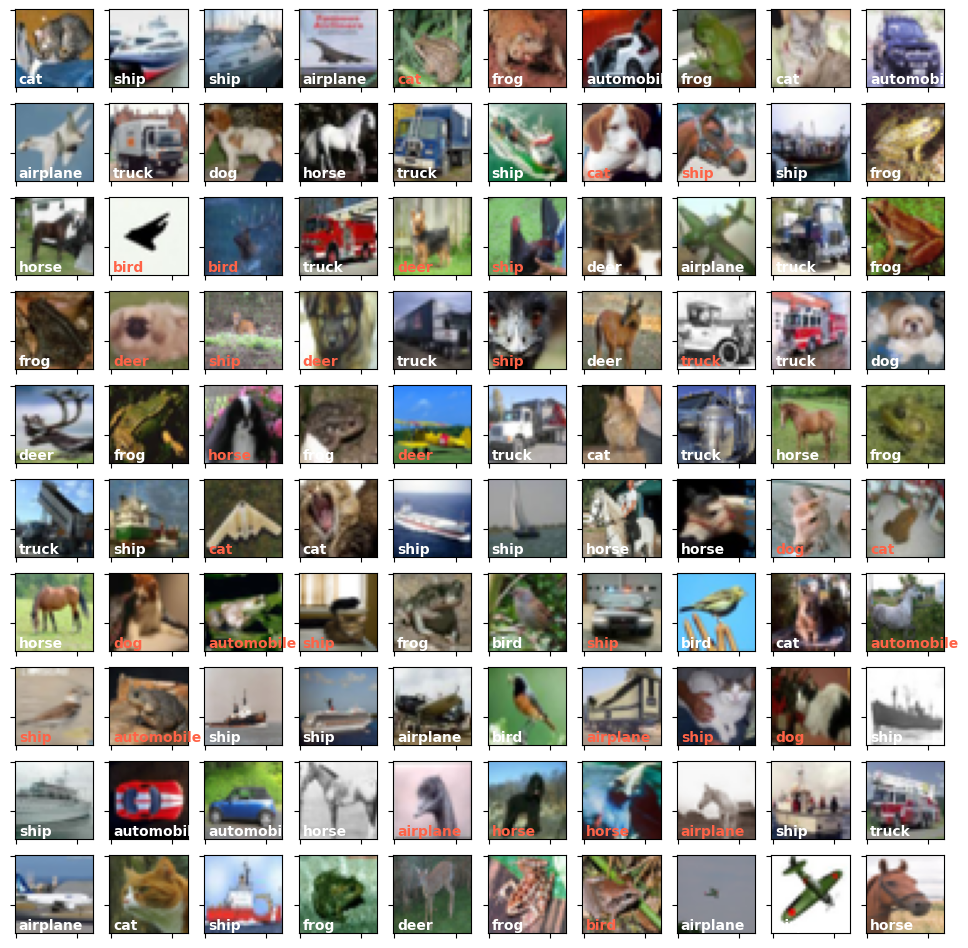

In [15]:
_, axes = plt.subplots(10, 10, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test_raw[i])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    pred = preds[i]
    act = class_labels[y_test_raw[i]]
    if pred == act:
        ax.text(0.05, 0.05, preds[i], color='white',
                weight='semibold', transform=ax.transAxes)
    else:
        ax.text(0.05, 0.05, preds[i], color='tomato',
                weight='semibold', transform=ax.transAxes)
plt.show();

## Exercises:

**Exercise 1:** Try different hyper-parameters to improve the model accuracy. 

**Exercise 2:** Capture the "history" of model fitting (i.e., the output of the `model.fit()` function) and plot (1) model accuracy, (2) validation accuracy, (3) model loss, and (4) validation loss, using `matplotlib`. (You can use `epoch` for the x-axis and put `accuracy` (or `loss`) on the y-axis.)